In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("iris.csv") 

df.head() 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# split our dataset into its attributes and labels
# we specify features (inputs / X variables)
# X = dataset[['Open', 'High', 'Low', 'Volume']].to_numpy()
# # labels (outputs / Y variable) for the model.
# y = np.where(dataset['Y2'] == 'down', 0, 1)

X = df.drop(['Species'], axis=1)
y = df['Species']

In [3]:

features = df.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=99)

In [4]:
from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

C:\Users\esoft\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\esoft\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\esoft\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

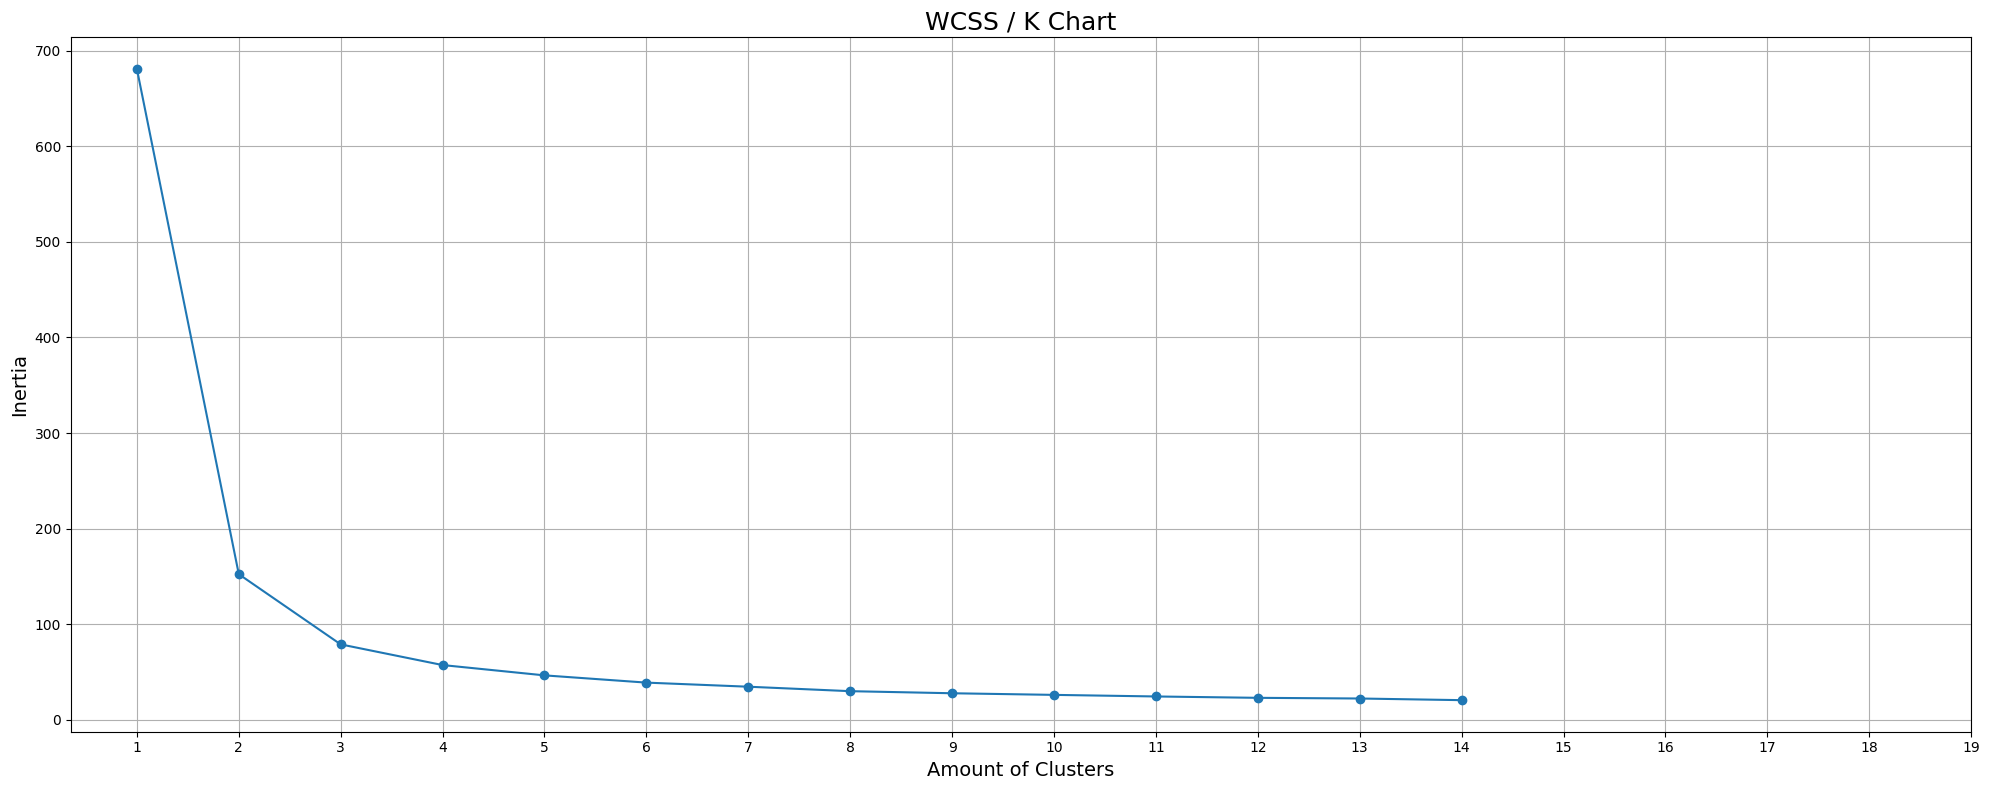

In [5]:
plt.figure(figsize=(20,8))
plt.title("WCSS / K Chart", fontsize=18)
plt.plot(range(1,15),wcss,"-o")
plt.grid(True)
plt.xlabel("Amount of Clusters",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()

In [6]:
from kneed import KneeLocator

k1 = KneeLocator(range(1,15), wcss, curve = 'convex', direction = 'decreasing')

k1.elbow

3

In [8]:
from sklearn.metrics import silhouette_score

kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
   }

# lista qe do te mbaje te gjitha vlerat e sil _ score

silhouette_coef = []
for k in range(2,15):
    kmeans= KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    score = silhouette_score(features, kmeans.labels_)
    silhouette_coef.append(score)

silhouette_coef

[0.6808136202936816,
 0.5525919445499757,
 0.4978256901095472,
 0.49285559183161204,
 0.36650401502359653,
 0.36049922148534125,
 0.34173480529240485,
 0.3082630415946513,
 0.31154473276692835,
 0.292262714697817,
 0.2921386165973165,
 0.27790477935072033,
 0.28182655095113307]

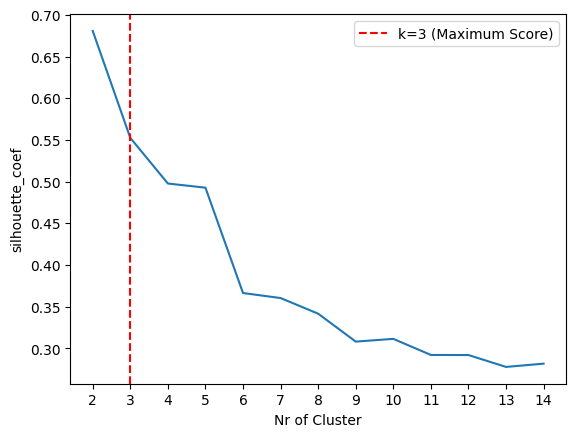

In [10]:
plt.plot(range(2,15), silhouette_coef)
plt.xticks(range(2,15))
plt.xlabel("Nr of Cluster")
plt.ylabel("silhouette_coef")

plt.axvline(x=3, color='red', linestyle = '--', label = 'k=3 (Maximum Score)')
plt.legend()